In [1]:
# %load simple_example.py
"""Run an simple experiment locally without using config file.

This file is presented as a very simple entry point to code.
For running any meaningful experiments, we suggest `batch_runner.py` or
`local_runner.py`.
"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys

import numpy as np
import pandas as pd
import plotnine as gg

from base.experiment import BaseExperiment
from finite_arm.agent_finite import FiniteBernoulliBanditTS
from finite_arm.env_finite import FiniteArmedBernoulliBandit

sys.path.append(os.getcwd())

##############################################################################
# Running a single experiment

n_arm = 3
probs = [0.7, 0.8, 0.9]
n_steps = 1000
seed = 0

agent = FiniteBernoulliBanditTS(n_arm)
env = FiniteArmedBernoulliBandit(probs)
experiment = BaseExperiment(agent, env, n_steps=1000,
                            seed=seed, unique_id='example')

experiment.run_experiment()

##############################################################################
# Simple display / plot of results

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='instant_regret', colour='unique_id')
     + gg.geom_line())
print(p)


<Figure size 600x400 with 1 Axes>

<ggplot: (8757390070573)>


In [1]:
import simple_example

<Figure size 600x400 with 1 Axes>

<ggplot: (8741989238717)>


In [1]:
# %load local_runner.py
"""Run an experiment locally from a config file.

We suggest that you use batch_runner.py for large scale experiments.
However, if you just want to play around with a smaller scale experiment then
this script can be useful.

The config file defines the selection of agents/environments/seeds that we want
to run. This script then runs through the first `N_JOBS` job_id's and then
collates the results for a simple plot.

Effectively, this script combines:
  - running `batch_runner.py` for several job_id
  - running `batch_analysis.py` to collate the data written to .csv

This is much simpler and fine for small sweeps, but is not scalable to large
parallel evaluations.

"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base import config_lib

import numpy as np
import pandas as pd
import plotnine as gg

# Presented here for clarity.
LIST_OF_VALID_CONFIGS = ['finite_arm.config_simple',
                         'finite_arm.config_simple_rand',
                         'finite_arm.config_simple_sanity',
                         'finite_arm.config_misspecified',
                         'finite_arm.config_drift',
                         'cascading.config_cascading',
                         'ensemble_nn.config_nn',
                         'graph.config_indep',
                         'graph.config_indep_binary',
                         'graph.config_correlated',
                         'graph.config_correlated_sanity',
                         'pricing.config_pricing']

CONFIG_PATH = 'logistic.config_logistic'
    #'finite_arm.config_simple'
N_JOBS = 2
    #100


#############################################################################
# Running from a local config file
sys.path.append(os.getcwd())

# Loading in the experiment config file
config_module = importlib.import_module(CONFIG_PATH)
config = config_module.get_config()

results = []
for job_id in range(N_JOBS):
  # Running the experiment.
  job_config = config_lib.get_job_config(config, job_id)
  experiment = job_config['experiment']
  experiment.run_experiment()
  results.append(experiment.results)


#############################################################################
# Collating data with Pandas
params_df = config_lib.get_params_df(config)
df = pd.merge(pd.concat(results), params_df, on='unique_id')
plt_df = (df.groupby(['agent', 't'])
          .agg({'instant_regret': np.mean})
          .reset_index())


#############################################################################
# Plotting and analysis (uses plotnine by default)
gg.theme_set(gg.theme_bw(base_size=16, base_family='serif'))
gg.theme_update(figure_size=(12, 8))

p = (gg.ggplot(plt_df)
     + gg.aes('t', 'instant_regret', colour='agent')
     + gg.geom_line())
print(p)





<Figure size 1200x800 with 1 Axes>

<ggplot: (8756108872745)>


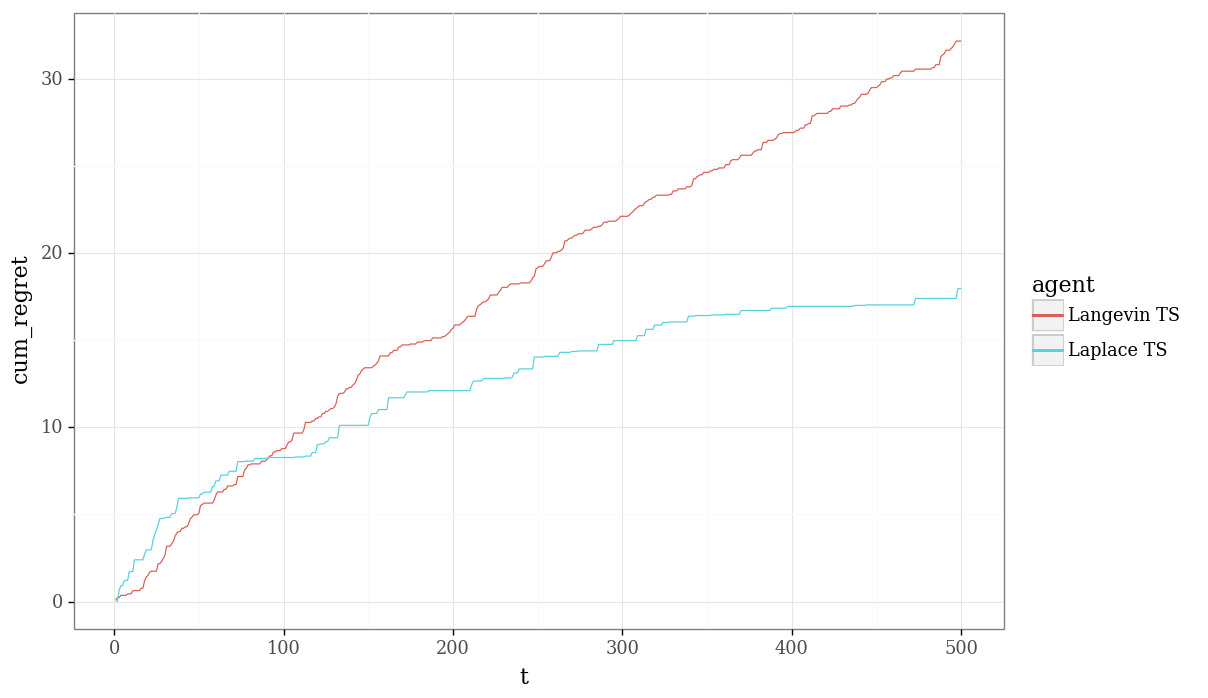

<ggplot: (8756218604697)>

In [2]:
plt_df_cum_regret = (df.groupby(['agent', 't'])
          .agg({'cum_regret': np.mean})
          .reset_index())

q = (gg.ggplot(plt_df_cum_regret)
     + gg.aes('t', 'cum_regret', colour='agent')
     + gg.geom_line())
q

In [11]:
results

[    cum_optimal  cum_regret  instant_regret    t  unique_id
 0      0.635306    0.307819        0.307819    1          0
 1      1.282111    0.307819        0.000000    2          0
 2      1.917417    0.615638        0.307819    3          0
 3      2.396283    1.016758        0.401120    4          0
 4      3.031589    1.324577        0.307819    5          0
 5      3.666895    1.324577        0.000000    6          0
 6      4.240945    1.324577        0.000000    7          0
 7      4.814996    1.324577        0.000000    8          0
 8      5.450302    1.324577        0.000000    9          0
 9      6.085608    1.324577        0.000000   10          0
 10     6.533966    1.416055        0.091478   11          0
 11     7.293714    1.627247        0.211191   12          0
 12     7.929020    1.627247        0.000000   13          0
 13     8.493637    1.627247        0.000000   14          0
 14     9.128943    1.627247        0.000000   15          0
 15     9.871517    1.62

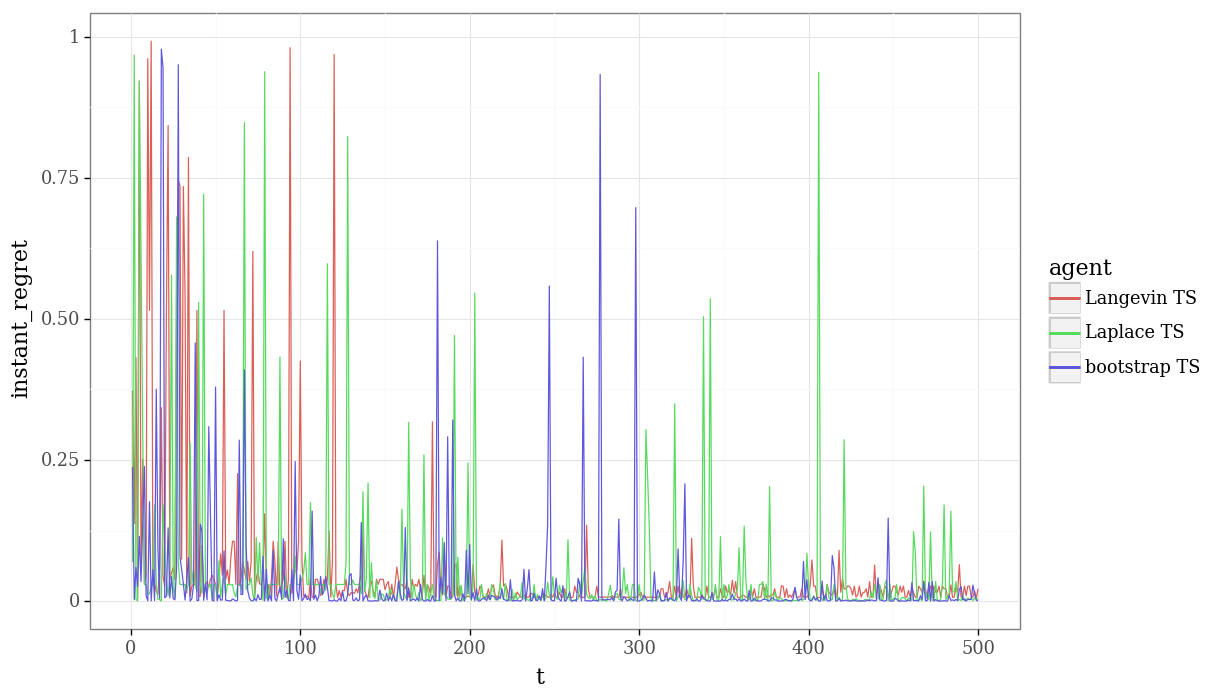

<ggplot: (8756218329393)>


In [4]:
# %load local_runner.py
"""Run an experiment locally from a config file.

We suggest that you use batch_runner.py for large scale experiments.
However, if you just want to play around with a smaller scale experiment then
this script can be useful.

The config file defines the selection of agents/environments/seeds that we want
to run. This script then runs through the first `N_JOBS` job_id's and then
collates the results for a simple plot.

Effectively, this script combines:
  - running `batch_runner.py` for several job_id
  - running `batch_analysis.py` to collate the data written to .csv

This is much simpler and fine for small sweeps, but is not scalable to large
parallel evaluations.

"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base import config_lib

import numpy as np
import pandas as pd
import plotnine as gg

# Presented here for clarity.
LIST_OF_VALID_CONFIGS = ['finite_arm.config_simple',
                         'finite_arm.config_simple_rand',
                         'finite_arm.config_simple_sanity',
                         'finite_arm.config_misspecified',
                         'finite_arm.config_drift',
                         'cascading.config_cascading',
                         'ensemble_nn.config_nn',
                         'graph.config_indep',
                         'graph.config_indep_binary',
                         'graph.config_correlated',
                         'graph.config_correlated_sanity',
                         'pricing.config_pricing']

CONFIG_PATH = 'graph.config_indep_binary'
    #'finite_arm.config_simple'
N_JOBS = 3
    #100


#############################################################################
# Running from a local config file
sys.path.append(os.getcwd())

# Loading in the experiment config file
config_module = importlib.import_module(CONFIG_PATH)
config = config_module.get_config()

results = []
for job_id in range(N_JOBS):
  # Running the experiment.
  job_config = config_lib.get_job_config(config, job_id)
  experiment = job_config['experiment']
  experiment.run_experiment()
  results.append(experiment.results)


#############################################################################
# Collating data with Pandas
params_df = config_lib.get_params_df(config)
df = pd.merge(pd.concat(results), params_df, on='unique_id')
plt_df = (df.groupby(['agent', 't'])
          .agg({'instant_regret': np.mean})
          .reset_index())


#############################################################################
# Plotting and analysis (uses plotnine by default)
gg.theme_set(gg.theme_bw(base_size=16, base_family='serif'))
gg.theme_update(figure_size=(12, 8))

p = (gg.ggplot(plt_df)
     + gg.aes('t', 'instant_regret', colour='agent')
     + gg.geom_line())
print(p)





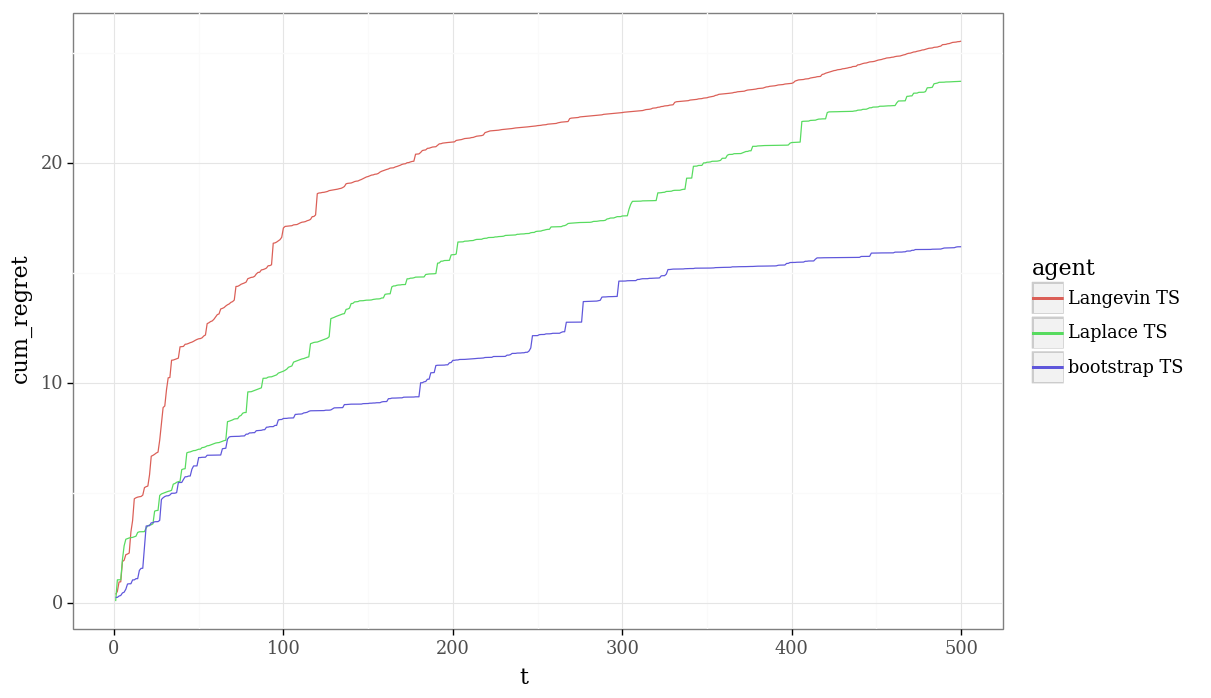

<ggplot: (8756218548573)>

In [5]:
plt_df_cum_regret = (df.groupby(['agent', 't'])
          .agg({'cum_regret': np.mean})
          .reset_index())

q = (gg.ggplot(plt_df_cum_regret)
     + gg.aes('t', 'cum_regret', colour='agent')
     + gg.geom_line())
q

In [2]:
# %load local_runner.py
"""Run an experiment locally from a config file.

We suggest that you use batch_runner.py for large scale experiments.
However, if you just want to play around with a smaller scale experiment then
this script can be useful.

The config file defines the selection of agents/environments/seeds that we want
to run. This script then runs through the first `N_JOBS` job_id's and then
collates the results for a simple plot.

Effectively, this script combines:
  - running `batch_runner.py` for several job_id
  - running `batch_analysis.py` to collate the data written to .csv

This is much simpler and fine for small sweeps, but is not scalable to large
parallel evaluations.

"""

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import importlib
import os
import sys

from base import config_lib

import numpy as np
import pandas as pd
import plotnine as gg

# Presented here for clarity.
LIST_OF_VALID_CONFIGS = ['finite_arm.config_simple',
                         'finite_arm.config_simple_rand',
                         'finite_arm.config_simple_sanity',
                         'finite_arm.config_misspecified',
                         'finite_arm.config_drift',
                         'cascading.config_cascading',
                         'ensemble_nn.config_nn',
                         'graph.config_indep',
                         'graph.config_indep_binary',
                         'graph.config_correlated',
                         'graph.config_correlated_sanity',
                         'pricing.config_pricing']


CONFIG_PATH = 'graph.config_indep_binary'
    #'finite_arm.config_simple'
N_JOBS = 1
    #100


#############################################################################
# Running from a local config file
sys.path.append(os.getcwd())

# Loading in the experiment config file
config_module = importlib.import_module(CONFIG_PATH)
config = config_module.get_config()

results = []
for job_id in range(N_JOBS):
  # Running the experiment.
  job_config = config_lib.get_job_config(config, job_id)
  experiment = job_config['experiment']
  experiment.run_experiment()
  results.append(experiment.results)


#############################################################################
# Collating data with Pandas
params_df = config_lib.get_params_df(config)
df = pd.merge(pd.concat(results), params_df, on='unique_id')
plt_df = (df.groupby(['agent', 't'])
          .agg({'instant_regret': np.mean})
          .reset_index())


#############################################################################
# Plotting and analysis (uses plotnine by default)
gg.theme_set(gg.theme_bw(base_size=16, base_family='serif'))
gg.theme_update(figure_size=(12, 8))

p = (gg.ggplot(plt_df)
     + gg.aes('t', 'instant_regret', colour='agent')
     + gg.geom_line())
print(p)





<Figure size 1200x800 with 1 Axes>

<ggplot: (8746730395837)>


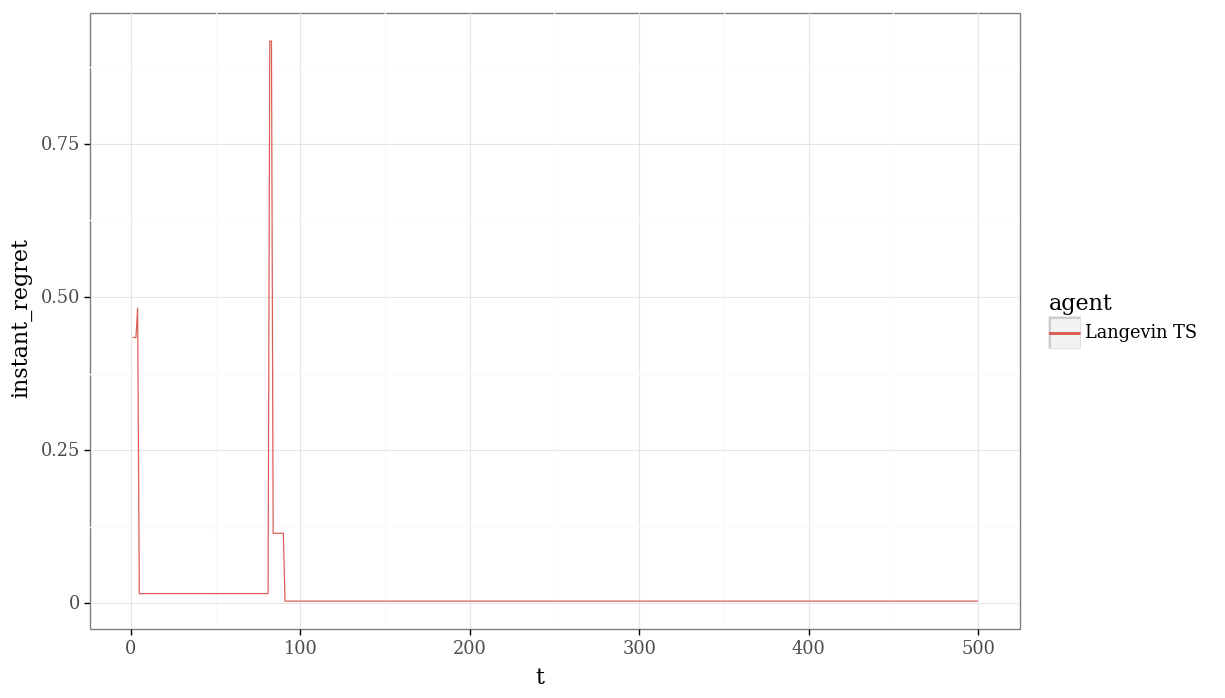

<ggplot: (8746730395837)>

In [3]:
p

In [6]:
# %load reproduce_figures.py
"""Script interface to reproduce figures from https://arxiv.org/abs/1707.02038


"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import argparse
import importlib
import collections
import os
import sys

import numpy as np
import pandas as pd
import plotnine as gg
import base.plot as bp

from base import config_lib

sys.path.append(os.getcwd())
gg.theme_set(gg.theme_bw(base_size=16, base_family='serif'))


# FIGURE_OPTIONS will hold all of the details for specific details to reproduce
# each figure. These include the config, number of jobs and the plot function.
# Figures are named with reference to "A Tutorial on Thompson Sampling":
#     https://arxiv.org/abs/1707.02038.

FigureOptions = collections.namedtuple(
    'FigureOptions', ['fig_name', 'config','paper_n_jobs', 'plot_fun'])

FIGURE_OPTIONS = collections.OrderedDict([
    ['3', FigureOptions(fig_name='3',
                        config='finite_arm.config_simple',
                        paper_n_jobs=20000,
                        plot_fun=bp.compare_action_selection_plot)],
    ['4a', FigureOptions(fig_name='4a',
                         config='finite_arm.config_simple',
                         paper_n_jobs=20000,
                         plot_fun=bp.simple_algorithm_plot)],
    ['4b', FigureOptions(fig_name='4b',
                         config='finite_arm.config_simple_rand',
                         paper_n_jobs=20000,
                         plot_fun=bp.simple_algorithm_plot)],
    ['6', FigureOptions(fig_name='6',
                        config='graph.config_indep',
                        paper_n_jobs=5000,
                        plot_fun=bp.cumulative_travel_time_plot)],
    ['7', FigureOptions(fig_name='7',
                        config='graph.config_correlated',
                        paper_n_jobs=3000,
                        plot_fun=bp.cumulative_travel_time_plot)],
    ['8', FigureOptions(fig_name='8',
                        config='graph.config_indep_binary',
                        paper_n_jobs=2000,
                        plot_fun=bp.simple_algorithm_plot)],
    ['9a', FigureOptions(fig_name='9a',
                         config='finite_arm.config_simple_sanity',
                         paper_n_jobs=30000,
                         plot_fun=bp.simple_algorithm_plot)],
    ['9b', FigureOptions(fig_name='9b',
                         config='graph.config_correlated_sanity',
                         paper_n_jobs=3000,
                         plot_fun=bp.simple_algorithm_plot)],
    ['11', FigureOptions(fig_name='11',
                         config='finite_arm.config_misspecified',
                         paper_n_jobs=20000,
                         plot_fun=bp.misspecified_plot)],
    ['12', FigureOptions(fig_name='12',
                         config='finite_arm.config_drift',
                         paper_n_jobs=20000,
                         plot_fun=bp.simple_algorithm_plot)],
    ['13', FigureOptions(fig_name='13',
                         config='pricing.config_pricing',
                         paper_n_jobs=2000,
                         plot_fun=bp.simple_algorithm_plot)],
    ['17', FigureOptions(fig_name='17',
                         config='ensemble_nn.config_nn',
                         paper_n_jobs=20000,
                         plot_fun=bp.ensemble_plot)],
])


###############################################################################
# Functions to reproduce each figure in the tutorial paper

def _load_experiment_name_from_config(config_path):
  """Extract the identifying experiment name from config."""
  experiment_config = importlib.import_module(config_path)
  config = experiment_config.get_config()
  return config.name


def _logging(figure_options, run_frac, data_path, plot_path):
  """Logging to screen.

  Args:
    figure_options: a FigureOptions namedtuple.
    run_frac: float in [0,1] of how many jobs to run vs paper.
    data_path: where to save intermediate experiment .csv.
    plot_path: where to save output plot.

  Returns:
    experiment_name: identifying string from config file.
    n_jobs: number of jobs to run.
  """
  experiment_name = _load_experiment_name_from_config(figure_options.config)
  n_jobs = int(run_frac * figure_options.paper_n_jobs)

  # Logging to screen
  print('*' * 80)
  print('Reproducing Figure {}, from TS Tutorial https://arxiv.org/abs/1707.02038'
         .format(figure_options.fig_name))
  print('With run_frac {} this will launch {} jobs, compared to {} in the paper.'
        .format(run_frac, n_jobs, figure_options.paper_n_jobs))
  print('The config file with all necessary details of the underlying'
        ' experiment is \n   {}.'.format(figure_options.config))
  print('The experiment results are saved to {} with experiment_id {}.'
        .format(data_path, experiment_name))
  print('The output plots are saved to {} with experiment_id {}.'
        .format(plot_path, experiment_name))
  print('\n')
  print('*' * 80)

  return experiment_name, n_jobs


def _save_plot_to_file(plot_dict, plot_path, run_frac=None):
  """Plots a dictionary of plotnine plots to file.

  Args:
    plot_dict: {plot_name: p} for p = plotnine plot.
    plot_path: path to save the file to.
    run_frac: optional float indicating run fraction (just for logging.)

  Returns:
    NULL, plot is written to file_path as a png file.
  """
  for plot_name, p in plot_dict.iteritems():
    file_path = os.path.join(plot_path, plot_name.lower() + '.png')
    file_path = file_path.replace(' ', '_')
    print('*' * 80)
    print('Saving final plot to ' + file_path)
    if run_frac is not None:
      print('This may not *precisely* match the paper due to run_frac {}'
            .format(run_frac))
    print('*' * 80)
    print('\n\n\n')
    if 'ensemble' in file_path:
      p.save(file_path, height=8, width=6)
    else:
      p.save(file_path, height=8, width=8)



def reproduce_figure(figure_options, run_frac, data_path, plot_path):
  """Function to reproduce figures for TS tutorial.

  Args:
    figure_options: a FigureOptions namedtuple.
    run_frac: float in [0,1] of how many jobs to run vs paper.
    data_path: where to save intermediate experiment .csv.
    plot_path: where to save output plot.

  Returns:
    None, experiment results are written to data_path and plots to plot_path.
  """
  experiment_name, n_jobs = _logging(
      figure_options, run_frac, data_path, plot_path)

  # Running the jobs via command line (this can/should be parallelized)
  for i in range(n_jobs):
    print('Starting job {} out of {}'.format(i, n_jobs))
    os.system('ipython batch_runner.py --config {} --job_id {} --save_path {}'
              .format(figure_options.config, i, data_path))

  # Plotting output
  plot_dict = figure_options.plot_fun(experiment_name, data_path)
  _save_plot_to_file(plot_dict, plot_path, run_frac)


def main(fig_str, run_frac, data_path, plot_path):
  """Either runs all of the experiments, or just a single figure."""
  if fig_str == 'all':
    for fig in FIGURE_OPTIONS:
      reproduce_figure(FIGURE_OPTIONS[fig], run_frac, data_path, plot_path)
  else:
    reproduce_figure(FIGURE_OPTIONS[fig_str], run_frac, data_path, plot_path)


###############################################################################
# Main function == script wrapper.

if __name__ == '__main__':
  # Parsing command line options
  parser = argparse.ArgumentParser(description='Reproduce figures.')
  fig_help = ('Figures to reproduce. Must be one of the following options:\n'
              '{}'.format(FIGURE_OPTIONS.keys() + ['all']))
  parser.add_argument('--figure', help=fig_help, type=str, default='3')
  run_help = 'Proportion of paper experiments to run. Must be in [0, 1].'
  parser.add_argument('--run_frac', help=run_help, type=float, default=0.01)
  data_help = 'Path to store intermediate .csv files of experiment results. Must exist in OS.'
  parser.add_argument('--data_path', help=data_help, type=str, default='/tmp/')
  plot_help = 'Path to store output paper plots. Must exist in OS.'
  parser.add_argument('--plot_path', help=plot_help, type=str, default='/tmp/')
  args = parser.parse_args()

  # Checking valid command line options
  run_frac_err = (run_help
                  + '\n\tYour input run_frac={}, please try again.'
                  .format(args.run_frac))
  assert args.run_frac >= 0., run_frac_err
  assert args.run_frac <= 1., run_frac_err

  figure_err = (fig_help
                + '\n\tYour input figure={}, please try again.'
                .format(args.figure))
  assert args.figure in set(FIGURE_OPTIONS.keys() + ['all']), figure_err

  dat_err =  (data_help
              + '\n\tYour input data_path={}, please try again.'
              .format(args.data_path))
  assert os.path.isdir(args.data_path), data_err

  plot_err = (plot_help
              + '\n\tYour input plot_path={}, please try again.'
              .format(args.plot_path))
  assert os.path.isdir(args.plot_path), plot_err

  # Logging to screen
  print('*' * 80)
  print('Parsing command line fig={}, run_frac={}, data_path={}, save_path={}'
        .format(args.figure, args.run_frac, args.data_path, args.plot_path))
  print('WARNING - this can take a long time on a single machine... you may want to parallelize the jobs.\n')

  # Running jobs
  main(args.figure, args.run_frac, args.data_path, args.plot_path)






usage: ipykernel_launcher.py [-h] [--figure FIGURE] [--run_frac RUN_FRAC]
                             [--data_path DATA_PATH] [--plot_path PLOT_PATH]
ipykernel_launcher.py: error: unrecognized arguments: -f /run/user/1000/jupyter/kernel-0af2be55-d9c9-48cc-b2c1-ff5fa4e8fce5.json


SystemExit: 2

/home/optml/holdenl/ts_tutorial/src/ts_tutorial/local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2886: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
